In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

df_transactions = pd.read_csv('./transactions.csv')
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

df_sales = pd.read_csv('./train.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'])

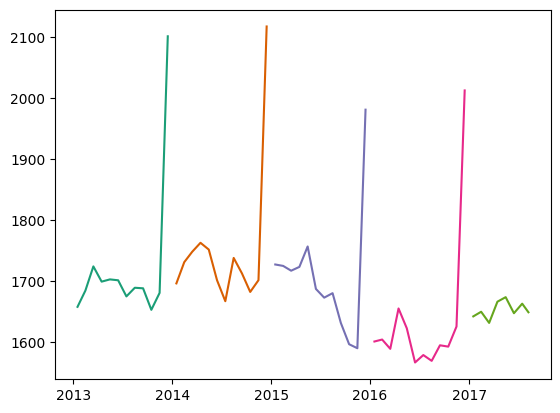

In [4]:
import matplotlib

df_per_month = df_transactions[['date', 'transactions']].groupby(df_transactions.date.dt.to_period("M")).mean()

df_per_month.head(10) 

fig, ax = plt.subplots()

ax.set_prop_cycle(color = plt.cm.Dark2.colors)

for y in range(2013, 2018):
    df_y = df_per_month[df_per_month['date'].dt.year == y]

    ax.plot(df_y['date'], df_y['transactions'])

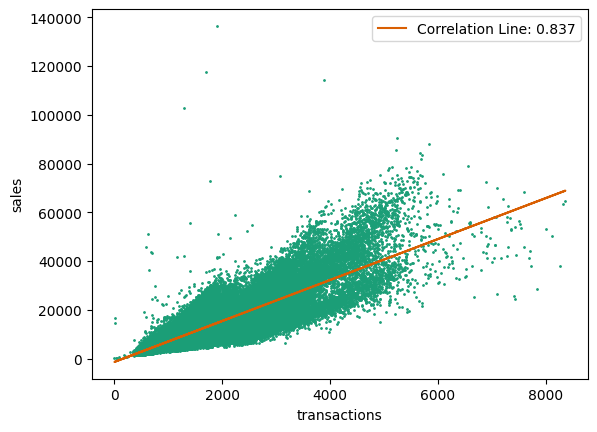

In [5]:

df_grouped_sales = df_sales.groupby(['store_nbr', 'date'])['sales'].sum()
df_grouped_transactions = df_transactions.groupby(['store_nbr', 'date'])['transactions'].sum()

df_sales_transactions = pd.merge(df_grouped_sales.to_frame(), df_grouped_transactions.to_frame(), left_index = True, right_index = True)

correlation = df_sales_transactions['sales'].corr(df_sales_transactions['transactions'])

# df_grouped_sales[('2017-01-02', 'r')]
fig, ax = plt.subplots()
ax.set_prop_cycle(color = plt.cm.Dark2.colors)
ax.scatter(df_sales_transactions['transactions'], df_sales_transactions['sales'], s = 1.0)

coeff = np.polyfit(df_sales_transactions['transactions'], df_sales_transactions['sales'], 1)
equation = np.poly1d(coeff)

x = df_sales_transactions['transactions'].unique()

ax.plot(x, equation(x), color = plt.cm.Dark2.colors[1], label=f'Correlation Line: {correlation:.3f}')

plt.xlabel('transactions')
plt.ylabel('sales')

plt.legend()
plt.show()

/var/folders/yx/8s316qtj1nj_k__wxtpx3x540000gv/T/ipykernel_19965/1276392439.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['mon', 'tue'])


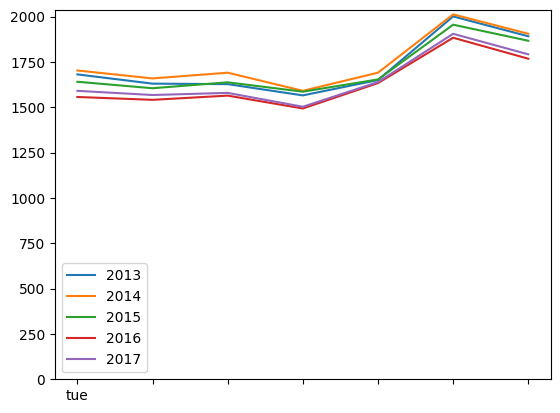

In [36]:
# df_sales_per_day = df_sales.groupby([df_sales['date'].dt.year, df_sales['date'].dt.weekday])['sales'].sum()
df_tx_per_day = df_transactions.groupby([df_transactions['date'].dt.year, df_transactions['date'].dt.weekday])['transactions'].mean()


fig, ax = plt.subplots()
ax.set_xticklabels('mon', 'tue')

for i, data in df_tx_per_day.groupby(level = 0):
    ax.plot(df_tx_per_day[i], label = i)
 
ax.set_ylim(bottom = 0)
ax.legend()